# LayerPlexRank - Other Experiments (Plotting Figures)

**Please note this document is a notebook used by the author to generate the figures in the paper only, all titles and descriptions have been removed on purpose. This document is based on *LayerPlexRank - EUAir Experiments*. Please refer to the original document for the specific settings and steps of the experiment.**

**Dataset:**

1. C.ELEGANS MULTIPLEX CONNECTOME
2. CS-AARHUS
3. CANDIDA MULTIPLEX GPI NETWORK

All of these datasets are downloaded from <https://manliodedomenico.com/data.php> and cited.

In [1]:
ce_path_dataset = "datasets/C.Elegans/CElegans_Connectome_multiplex.csv"
ce_path_layers = "datasets/C.Elegans/CElegans_connectome_layers.txt"
ce_path_nodes = "datasets/C.Elegans/CElegans_connectome_nodes.txt"
ce_path_sub_datasets_for_loocv = "datasets/C.Elegans/LOOCV_subdatasets_CElegans/*"


aarhus_path_dataset = "datasets/CSAarhus/CSAarhus_multiplex.csv"
aarhus_path_layers = "datasets/CSAarhus/CSAarhus_layers.txt"
aarhus_path_nodes = "datasets/CSAarhus/CSAarhus_nodes.txt"
aarhus_path_sub_datasets_for_loocv = "datasets/CSAarhus/LOOCV_subdatasets_CSAarhus/*"


candida_path_dataset = "datasets/Candida/candida_genetic_multiplex.csv"
candida_path_layers = "datasets/Candida/candida_genetic_layers.txt"
candida_path_nodes = "datasets/Candida/candida_genetic_nodes.txt"
candida_path_sub_datasets_for_loocv = "datasets/Candida/LOOCV_subdatasets_candida/*"

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from LayerPlexRank import *
from ExperimentHelpers import *


ce_network, ce_shape = load_network(ce_path_dataset)
ce_fiedler = calculate_fiedler_value(ce_network, ce_shape)
ce_X, ce_Z = layer_plex_rank(ce_network, ce_shape, ce_fiedler, 1, 1, 1)


aarhus_network, aarhus_shape = load_network(aarhus_path_dataset)
aarhus_fiedler = calculate_fiedler_value(aarhus_network, aarhus_shape)
aarhus_X, aarhus_Z = layer_plex_rank(aarhus_network, aarhus_shape, aarhus_fiedler, 1, 1, 1)


candida_network, candida_shape = load_network(candida_path_dataset)
candida_fiedler = calculate_fiedler_value(candida_network, candida_shape)
candida_X, candida_Z = layer_plex_rank(candida_network, candida_shape, candida_fiedler, 1, 1, 1)

In [5]:
ce_bX, ce_bZ = benchmark_centrality(ce_network, ce_shape, 'betweenness')
ce_cX, ce_cZ = benchmark_centrality(ce_network, ce_shape, 'closeness')
ce_dX, ce_dZ = benchmark_centrality(ce_network, ce_shape, 'degree')
ce_eX, ce_eZ = benchmark_centrality(ce_network, ce_shape, 'eigenvector')
ce_pX, ce_pZ = benchmark_centrality(ce_network, ce_shape, 'pagerank')


aarhus_bX, aarhus_bZ = benchmark_centrality(aarhus_network, aarhus_shape, 'betweenness')
aarhus_cX, aarhus_cZ = benchmark_centrality(aarhus_network, aarhus_shape, 'closeness')
aarhus_dX, aarhus_dZ = benchmark_centrality(aarhus_network, aarhus_shape, 'degree')
aarhus_eX, aarhus_eZ = benchmark_centrality(aarhus_network, aarhus_shape, 'eigenvector')
aarhus_pX, aarhus_pZ = benchmark_centrality(aarhus_network, aarhus_shape, 'pagerank')


candida_bX, candida_bZ = benchmark_centrality(candida_network, candida_shape, 'betweenness')
candida_cX, candida_cZ = benchmark_centrality(candida_network, candida_shape, 'closeness')
candida_dX, candida_dZ = benchmark_centrality(candida_network, candida_shape, 'degree')
candida_eX, candida_eZ = benchmark_centrality(candida_network, candida_shape, 'eigenvector')
candida_pX, candida_pZ = benchmark_centrality(candida_network, candida_shape, 'pagerank')

In [6]:
ce_nodes_centralities = {
    'X': ce_X,
    'bX': ce_bX,
    'cX': ce_cX,
    'dX': ce_dX,
    'eX': ce_eX,
    'pX': ce_pX
}

aarhus_nodes_centralities = {
    'X': aarhus_X,
    'bX': aarhus_bX,
    'cX': aarhus_cX,
    'dX': aarhus_dX,
    'eX': aarhus_eX,
    'pX': aarhus_pX
}

candida_nodes_centralities = {
    'X': candida_X,
    'bX': candida_bX,
    'cX': candida_cX,
    'dX': candida_dX,
    'eX': candida_eX,
    'pX': candida_pX
}


ce_nodes_rho, ce_nodes_p = calculate_spearman_for_lists(ce_nodes_centralities)
aarhus_nodes_rho, aarhus_nodes_p = calculate_spearman_for_lists(aarhus_nodes_centralities)
candida_nodes_rho, candida_nodes_p = calculate_spearman_for_lists(candida_nodes_centralities)

In [7]:
ce_layers_influences = {
    'Z': ce_Z,
    'bZ': ce_bZ,
    'cZ': ce_cZ,
    'dZ': ce_dZ,
    'eZ': ce_eZ,
    'pZ': ce_pZ
}

aarhus_layers_influences = {
    'Z': aarhus_Z,
    'bZ': aarhus_bZ,
    'cZ': aarhus_cZ,
    'dZ': aarhus_dZ,
    'eZ': aarhus_eZ,
    'pZ': aarhus_pZ
}


candida_layers_influences = {
    'Z': candida_Z,
    'bZ': candida_bZ,
    'cZ': candida_cZ,
    'dZ': candida_dZ,
    'eZ': candida_eZ,
    'pZ': candida_pZ
}


ce_layers_rho, ce_layers_p = calculate_spearman_for_lists(ce_layers_influences)
aarhus_layers_rho, aarhus_layers_p = calculate_spearman_for_lists(aarhus_layers_influences)
candida_layers_rho, candida_layers_p = calculate_spearman_for_lists(candida_layers_influences)

In [8]:
ce_nodes = pd.read_csv(ce_path_nodes, sep=" ")
ce_nodes['weight'] = ce_X
ce_nodes.sort_values(by=['weight'], ascending=False).reset_index(drop=True).head(5)

,nodeID,nodeLabel,weight
0,54,AVAL,0.031359
1,55,AVAR,0.031142
2,56,AVBL,0.015136
3,57,AVBR,0.014926
4,151,PVCL,0.014286


In [9]:
ce_layers = pd.read_csv(ce_path_layers, sep=" ")
ce_layers['weight'] = ce_Z
ce_layers.sort_values(by=['weight'], ascending=False).reset_index(drop=True).head(5)

,layerID,layerLabel,weight
0,3,PolySyn,0.542142
1,2,MonoSyn,0.287928
2,1,ElectrJ,0.169929


In [10]:
aarhus_nodes = pd.read_csv(aarhus_path_nodes, sep=" ")
aarhus_nodes['weight'] = aarhus_X
aarhus_nodes.sort_values(by=['weight'], ascending=False).reset_index(drop=True).head(5)

,nodeID,nodeLabel,weight
0,23,U91,0.053437
1,44,U4,0.049199
2,26,U130,0.048448
3,46,U110,0.047426
4,51,U67,0.046493


In [11]:
aarhus_layers = pd.read_csv(aarhus_path_layers, sep=" ")
aarhus_layers['weight'] = aarhus_Z
aarhus_layers.sort_values(by=['weight'], ascending=False).reset_index(drop=True).head(5)

,layerID,layerLabel,weight
0,5,work,0.331815
1,1,lunch,0.259616
2,2,facebook,0.246497
3,4,leisure,0.127749
4,3,coauthor,0.034323


In [12]:
candida_nodes = pd.read_csv(candida_path_nodes, sep=" ")
candida_nodes['weight'] = candida_X
candida_nodes.sort_values(by=['weight'], ascending=False).reset_index(drop=True).head(5)

,nodeID,nodeLabel,weight
0,48,HSP90,0.535687
1,14,CBK1,0.056322
2,1,MEP2,0.003113
3,6,ESA1,0.002327
4,7,SAS2,0.002327


In [13]:
candida_layers = pd.read_csv(candida_path_layers, sep=" ")
candida_layers['weight'] = candida_Z
candida_layers.sort_values(by=['weight'], ascending=False).reset_index(drop=True).head(5)

,layerID,layerLabel,weight
0,1,synthetic_genetic_interaction_defined_by_inequ...,0.983011
1,4,additive_genetic_interaction_defined_by_inequa...,0.008077
2,7,colocalization,0.008052
3,2,direct_interaction,0.000641
4,6,association,0.000114


In [14]:
%config InlineBackend.figure_format = 'retina'

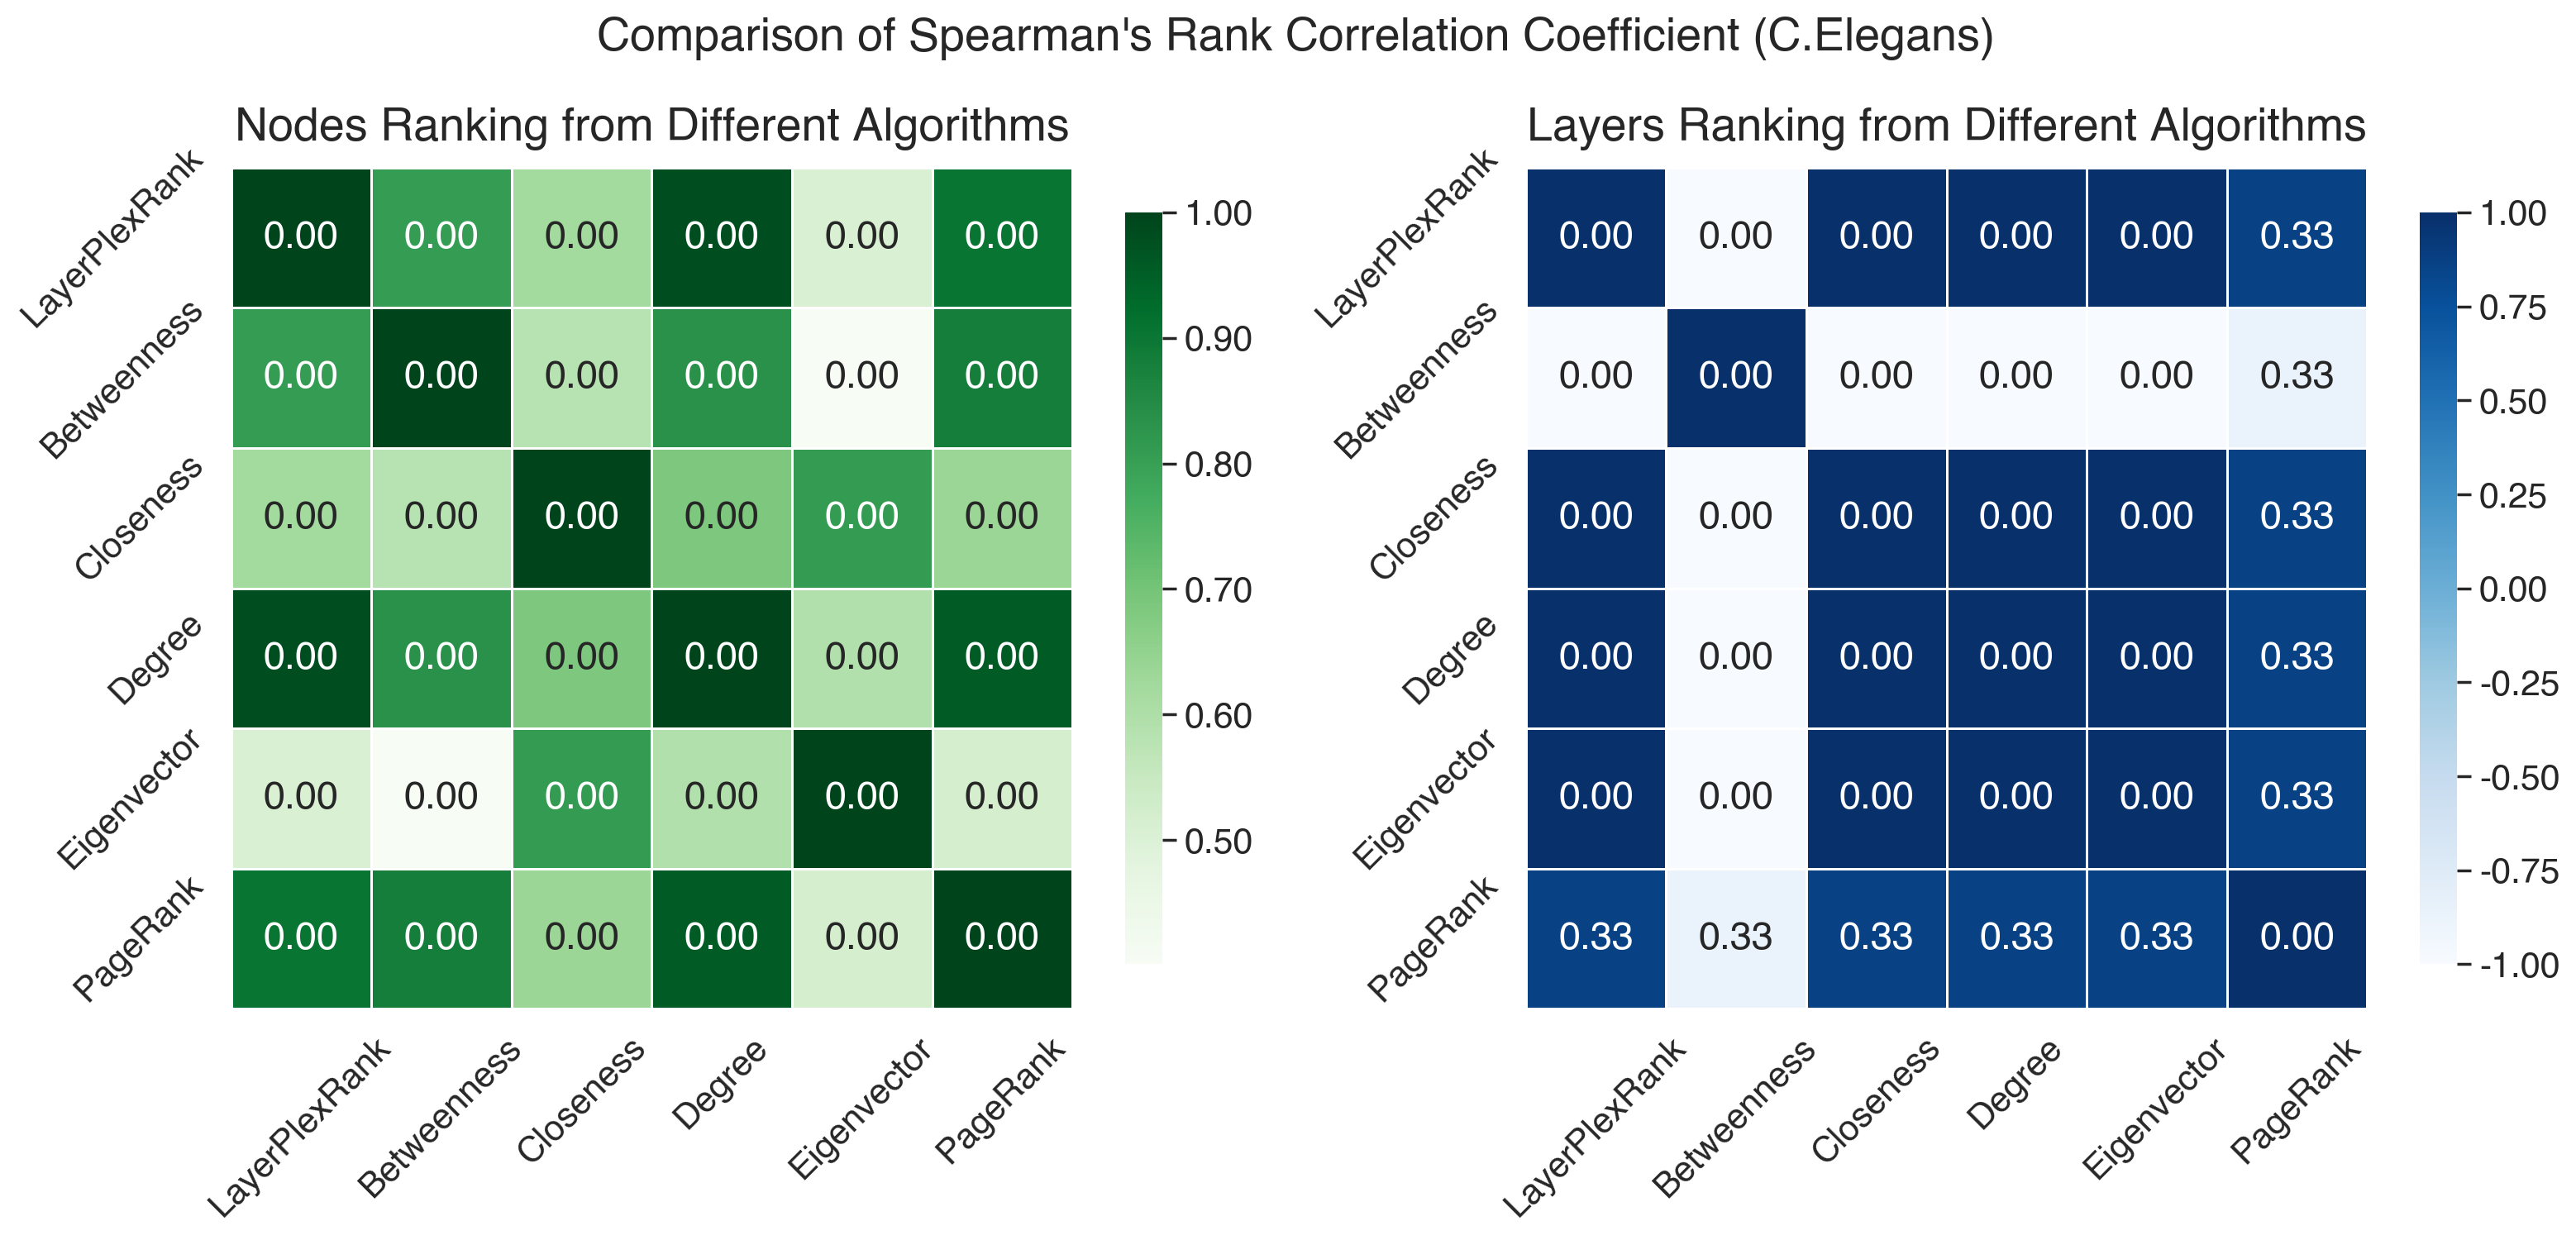

In [61]:
algo_names = ['LayerPlexRank', 'Betweenness', 'Closeness', 'Degree', 'Eigenvector', 'PageRank']
#algo_names = ['L', 'B', 'C', 'D', 'E', 'P']

ce_nodes_fig_title = "Nodes Ranking from Different Algorithms"
ce_layers_fig_title = "Layers Ranking from Different Algorithms"
ce_suptitle = "Comparison of Spearman\'s Rank Correlation Coefficient (C.Elegans)"
ce_short_title = "C.Elegans Dataset"

ce_heatmap_save_path = "img/ce_exp1_heatmap.eps"

# Color denotes the Spearman correlation coefficient, with corresponding p-values annotated on the figure.
plot_and_save_correlation_heatmaps(ce_nodes_rho, ce_nodes_p, ce_layers_rho, ce_layers_p, algo_names,
                                   ce_nodes_fig_title, ce_layers_fig_title, ce_suptitle, ce_short_title,
                                   'horizontal', ce_heatmap_save_path)

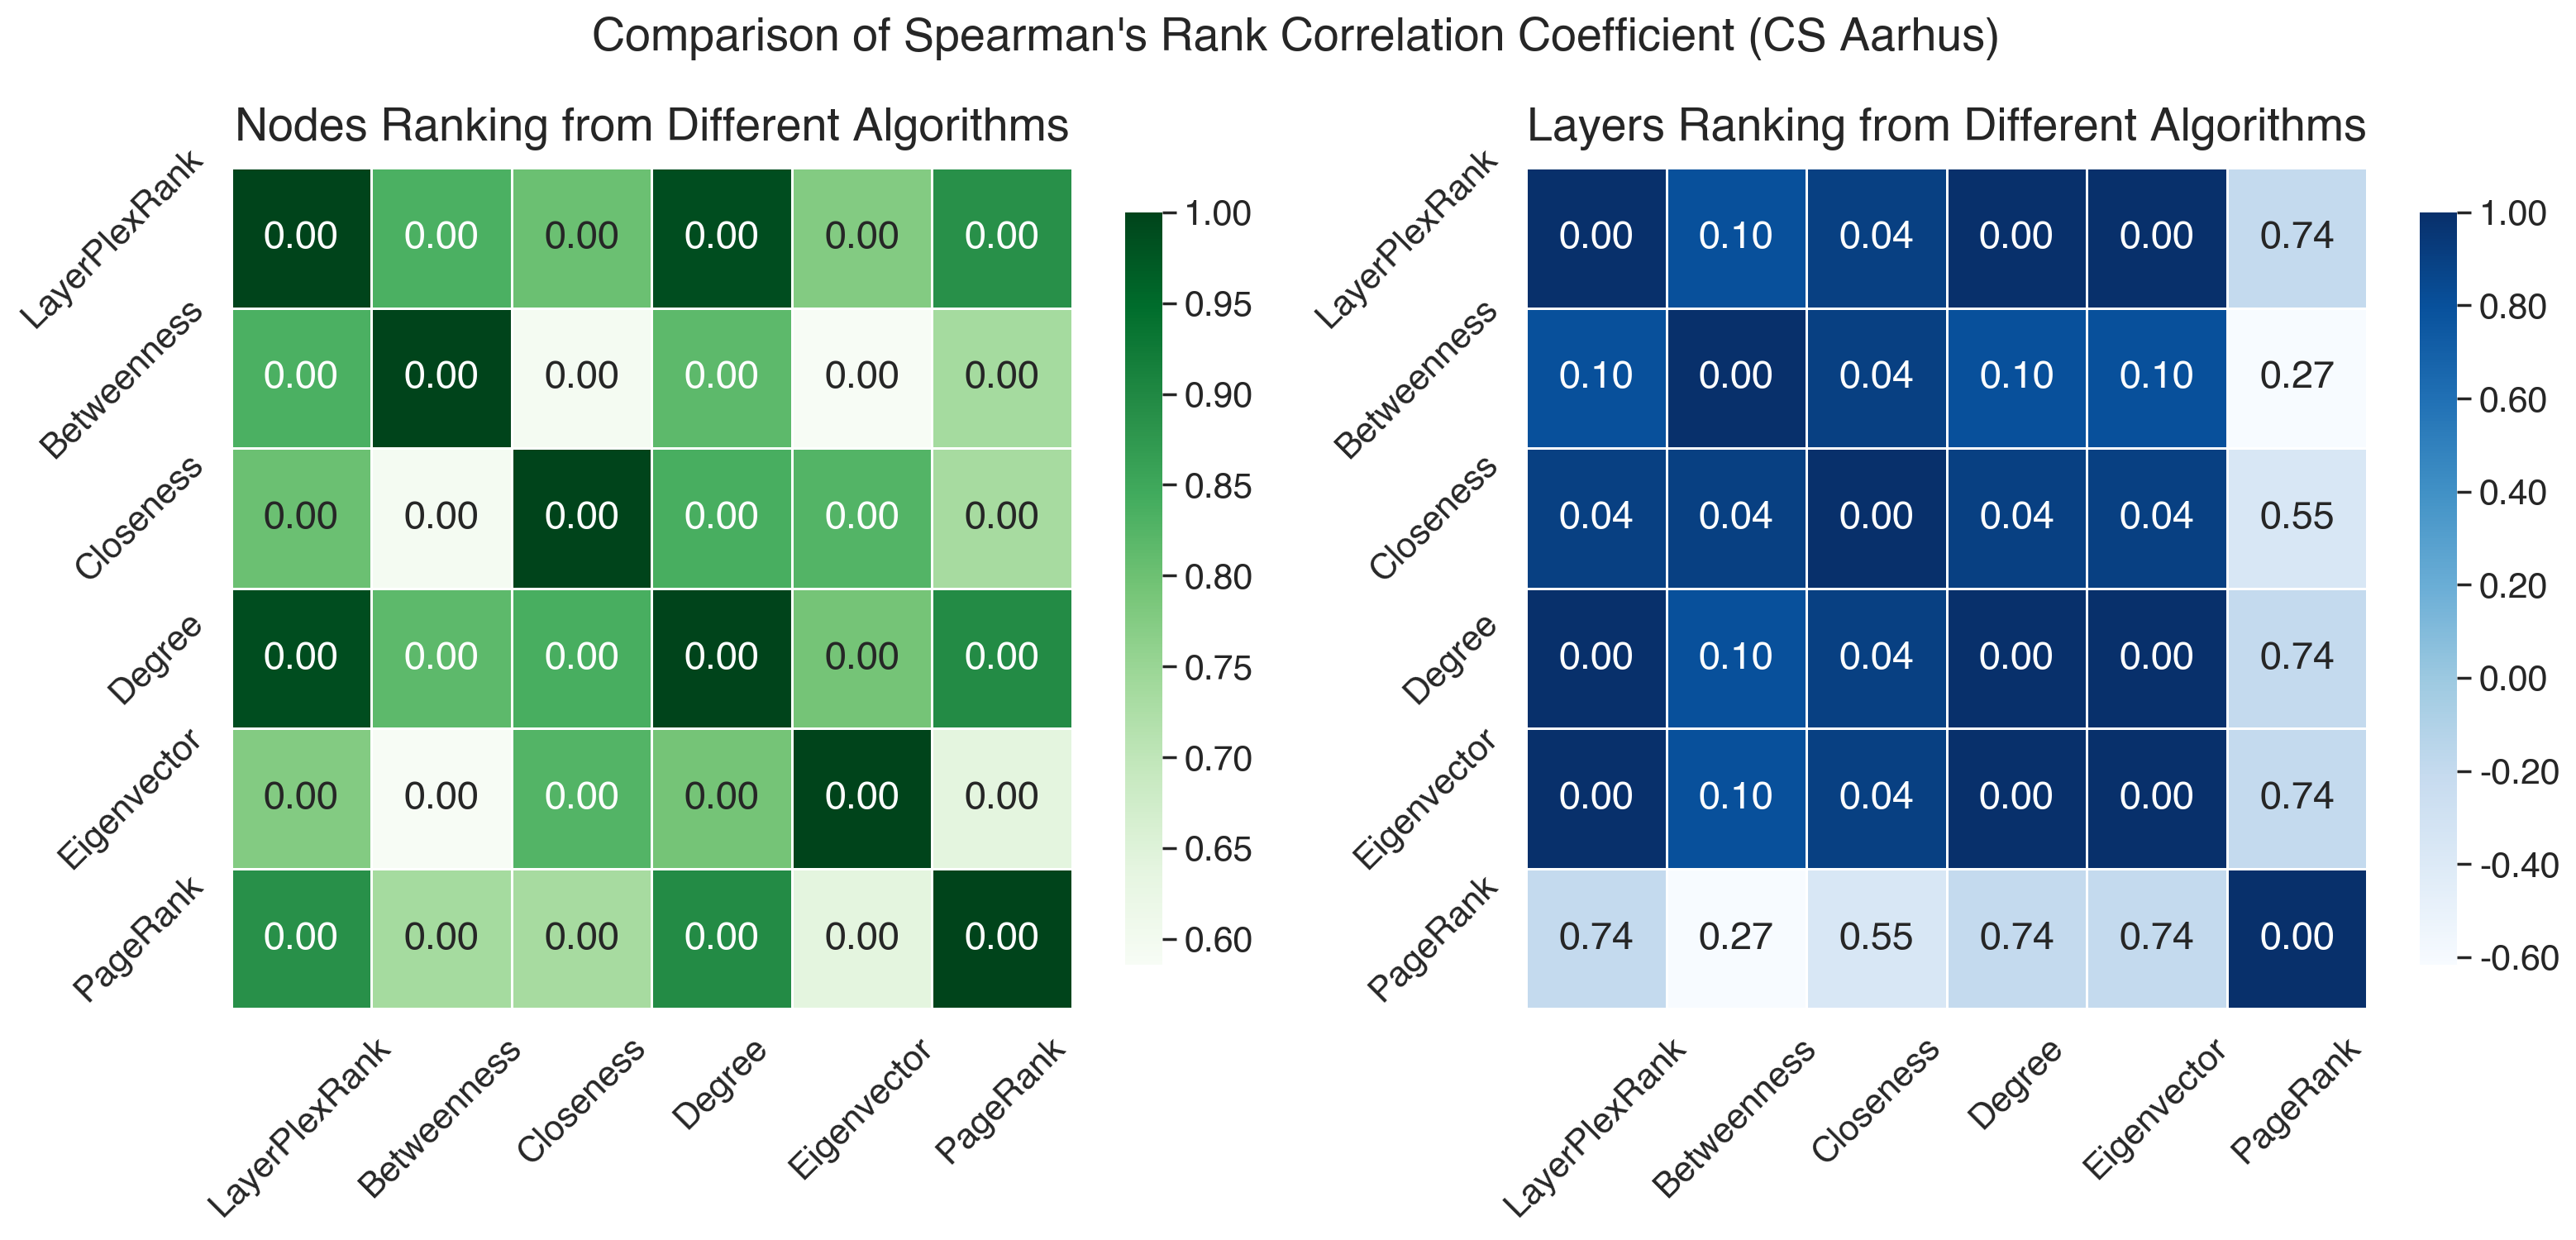

In [62]:
aarhus_nodes_fig_title = "Nodes Ranking from Different Algorithms"
aarhus_layers_fig_title = "Layers Ranking from Different Algorithms"
aarhus_suptitle = "Comparison of Spearman\'s Rank Correlation Coefficient (CS Aarhus)"
aarhus_short_title = "CS Aarhus Dataset"

aarhus_heatmap_save_path = "img/aarhus_exp1_heatmap.eps"

# Color denotes the Spearman correlation coefficient, with corresponding p-values annotated on the figure.
plot_and_save_correlation_heatmaps(aarhus_nodes_rho, aarhus_nodes_p, aarhus_layers_rho, aarhus_layers_p, algo_names,
                                   aarhus_nodes_fig_title, aarhus_layers_fig_title, aarhus_suptitle, aarhus_short_title,
                                   'horizontal', aarhus_heatmap_save_path)

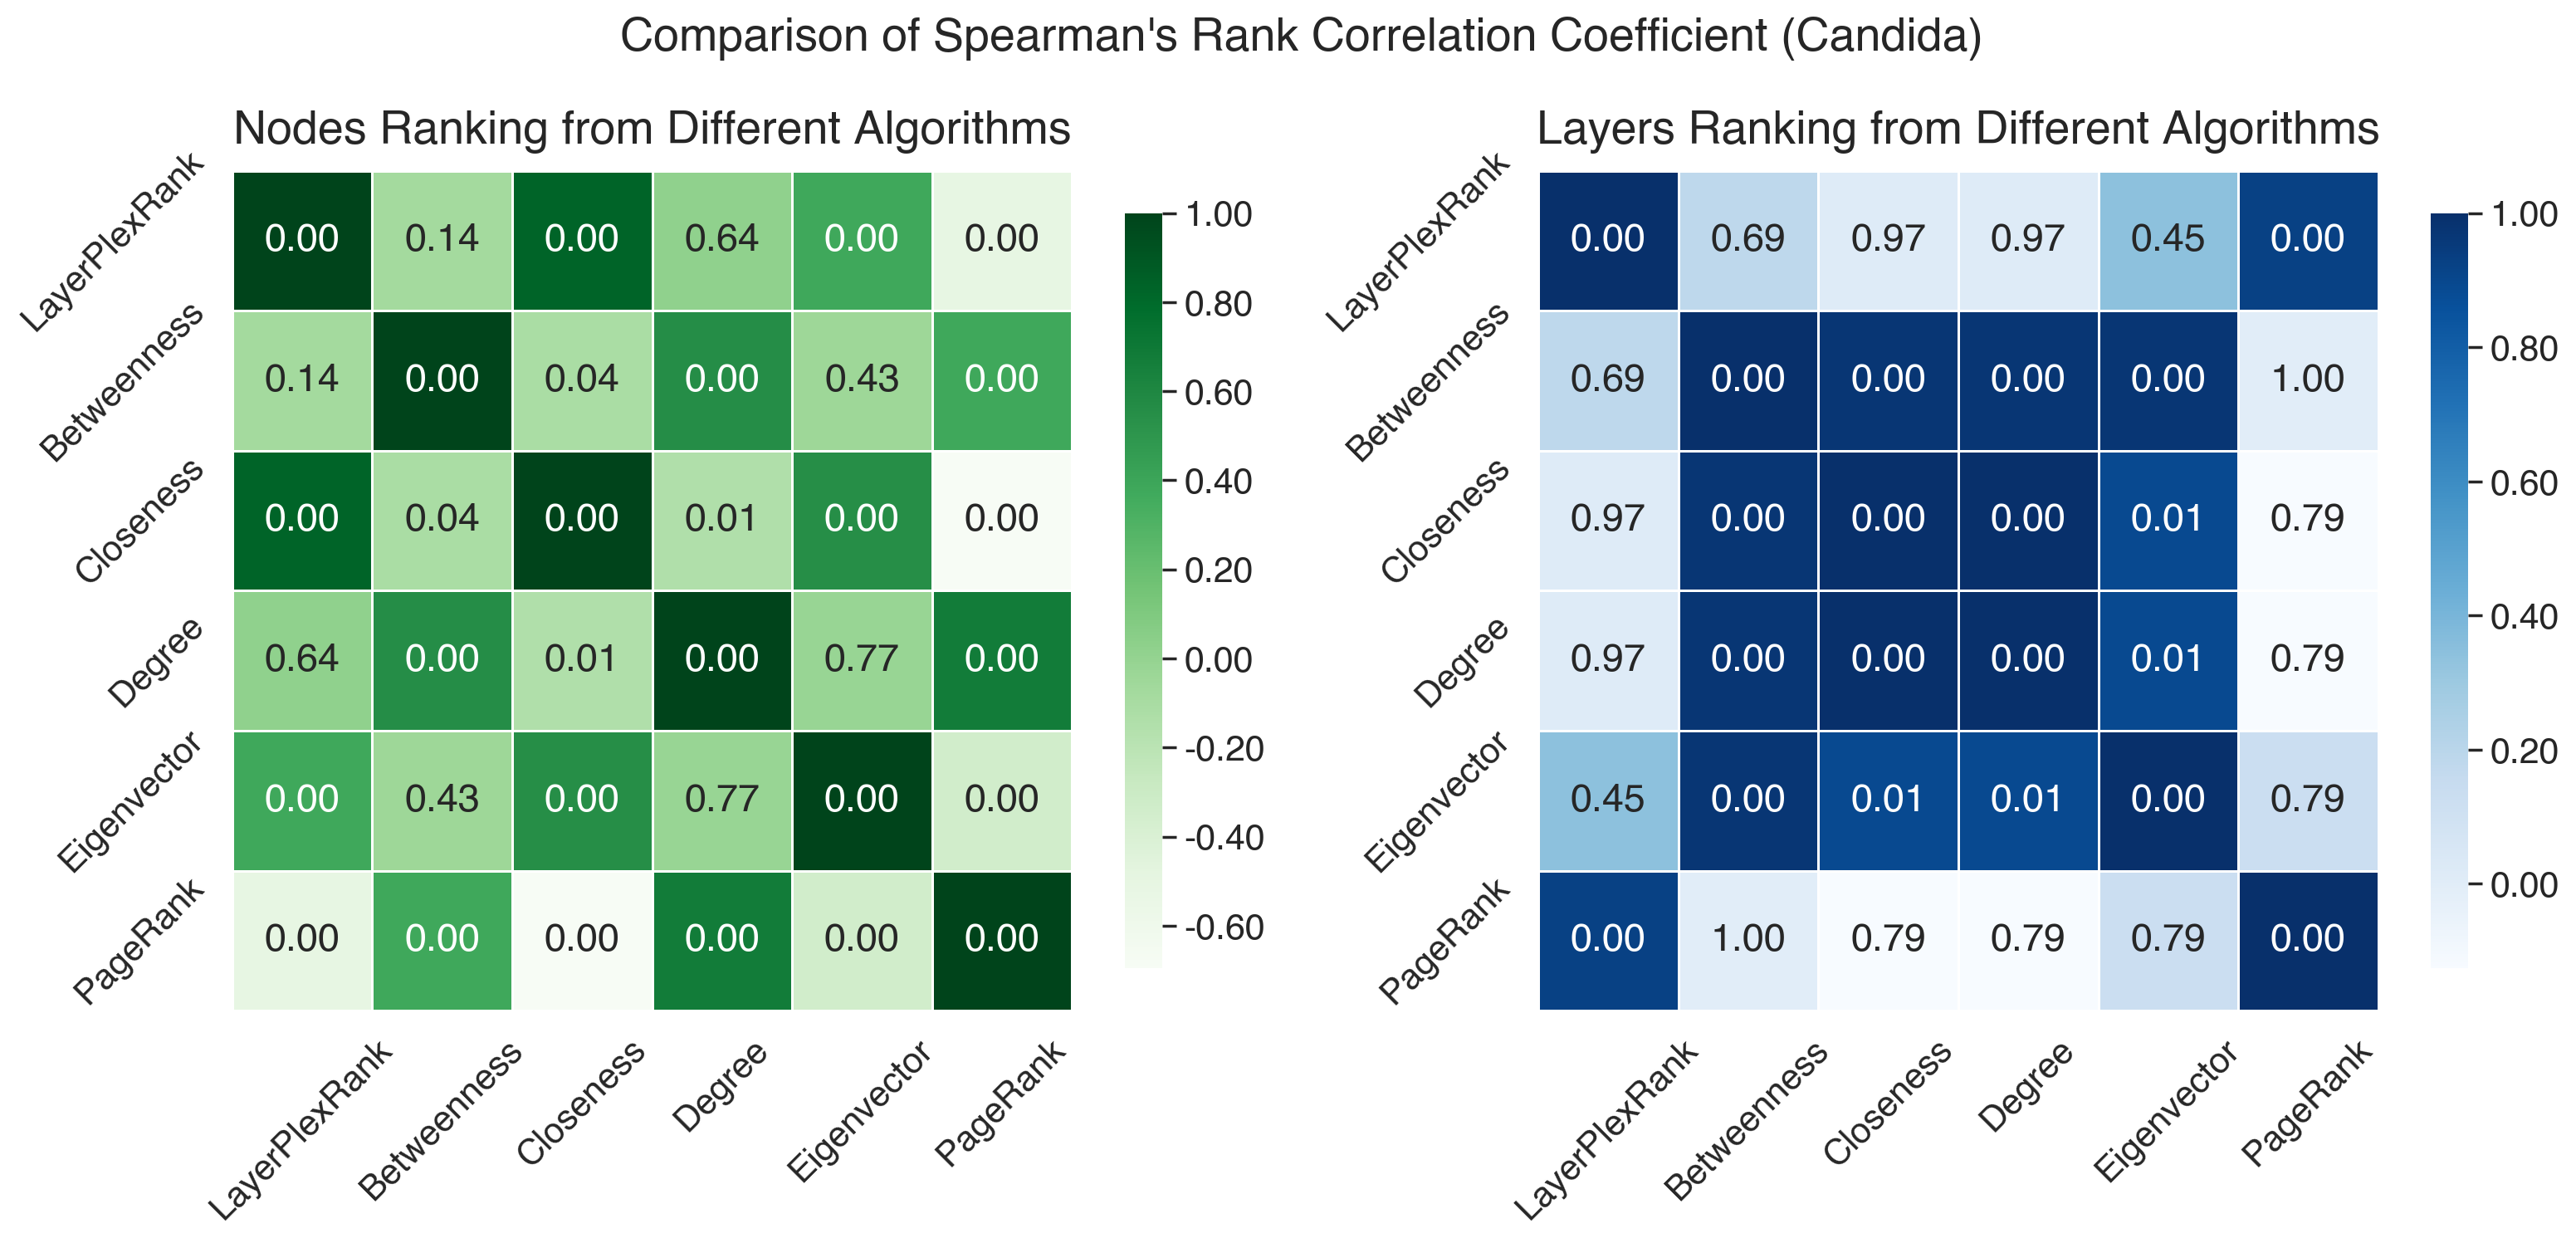

In [63]:
candida_nodes_fig_title = "Nodes Ranking from Different Algorithms"
candida_layers_fig_title = "Layers Ranking from Different Algorithms"
candida_suptitle = "Comparison of Spearman\'s Rank Correlation Coefficient (Candida)"
candida_short_title = "Candida Dataset"

candida_heatmap_save_path = "img/candida_exp1_heatmap.eps"

# Color denotes the Spearman correlation coefficient, with corresponding p-values annotated on the figure.
plot_and_save_correlation_heatmaps(candida_nodes_rho, candida_nodes_p, candida_layers_rho, candida_layers_p, algo_names,
                                   candida_nodes_fig_title, candida_layers_fig_title, candida_suptitle, candida_short_title,
                                   'horizontal', candida_heatmap_save_path)

In [53]:
from glob import glob
import re


ce_files_list = glob(ce_path_sub_datasets_for_loocv)
ce_files_list.sort(key=lambda f: int(re.sub('\D', '', f)))


aarhus_files_list = glob(aarhus_path_sub_datasets_for_loocv)
aarhus_files_list.sort(key=lambda f: int(re.sub('\D', '', f)))


candida_files_list = glob(candida_path_sub_datasets_for_loocv)
candida_files_list.sort(key=lambda f: int(re.sub('\D', '', f)))

In [19]:
ce_lpr_pct_diff_nodes = loocv(ce_files_list,ce_network, ce_shape, "LayerPlexRank", sort=True)
ce_b_pct_diff_nodes = loocv(ce_files_list, ce_network, ce_shape, "betweenness", sort=True)
ce_c_pct_diff_nodes = loocv(ce_files_list, ce_network, ce_shape, "closeness", sort=True)
ce_d_pct_diff_nodes = loocv(ce_files_list, ce_network, ce_shape, "degree", sort=True)
ce_e_pct_diff_nodes = loocv(ce_files_list, ce_network, ce_shape, "eigenvector", sort=True)
ce_p_pct_diff_nodes = loocv(ce_files_list, ce_network, ce_shape, "pagerank", sort=True)

100%|█████████████████████████████████████████| 279/279 [00:08<00:00, 31.15it/s]


In [20]:
aarhus_lpr_pct_diff_nodes = loocv(aarhus_files_list, aarhus_network, aarhus_shape, "LayerPlexRank", sort=True)
aarhus_b_pct_diff_nodes = loocv(aarhus_files_list, aarhus_network, aarhus_shape, "betweenness", sort=True)
aarhus_c_pct_diff_nodes = loocv(aarhus_files_list, aarhus_network, aarhus_shape, "closeness", sort=True)
aarhus_d_pct_diff_nodes = loocv(aarhus_files_list, aarhus_network, aarhus_shape, "degree", sort=True)
aarhus_e_pct_diff_nodes = loocv(aarhus_files_list, aarhus_network, aarhus_shape, "eigenvector", sort=True)
aarhus_p_pct_diff_nodes = loocv(aarhus_files_list, aarhus_network, aarhus_shape, "pagerank", sort=True)

100%|███████████████████████████████████████████| 61/61 [00:00<00:00, 85.90it/s]


In [21]:
candida_lpr_pct_diff_nodes = loocv(candida_files_list, candida_network, candida_shape, "LayerPlexRank", sort=True)
candida_b_pct_diff_nodes = loocv(candida_files_list, candida_network, candida_shape, "betweenness", sort=True)
candida_c_pct_diff_nodes = loocv(candida_files_list, candida_network, candida_shape, "closeness", sort=True)
candida_d_pct_diff_nodes = loocv(candida_files_list, candida_network, candida_shape, "degree", sort=True)
candida_e_pct_diff_nodes = loocv(candida_files_list, candida_network, candida_shape, "eigenvector", sort=True)
candida_p_pct_diff_nodes = loocv(candida_files_list, candida_network, candida_shape, "pagerank", sort=True)

100%|█████████████████████████████████████████| 367/367 [00:13<00:00, 27.18it/s]


In [22]:
print(f"{'LayerPlexRank:':<16} Total: {np.sum(ce_lpr_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(ce_lpr_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Betweenness:':<16} Total: {np.sum(ce_b_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(ce_b_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Closeness:':<16} Total: {np.sum(ce_c_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(ce_c_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Degree:':<16} Total: {np.sum(ce_d_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(ce_d_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Eigenvector:':<16} Total: {np.sum(ce_e_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(ce_e_pct_diff_nodes) * 100:7.3f}%")
print(f"{'PageRank:':<16} Total: {np.sum(ce_p_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(ce_p_pct_diff_nodes) * 100:7.3f}%")

LayerPlexRank:   Total:    60.120%,   Average:   0.215%
Betweenness:     Total:    69.660%,   Average:   0.250%
Closeness:       Total:    67.581%,   Average:   0.242%
Degree:          Total:   126.512%,   Average:   0.453%
Eigenvector:     Total:    63.995%,   Average:   0.229%
PageRank:        Total:    59.485%,   Average:   0.213%


In [23]:
print(f"{'LayerPlexRank:':<16} Total: {np.sum(aarhus_lpr_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(aarhus_lpr_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Betweenness:':<16} Total: {np.sum(aarhus_b_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(aarhus_b_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Closeness:':<16} Total: {np.sum(aarhus_c_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(aarhus_c_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Degree:':<16} Total: {np.sum(aarhus_d_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(aarhus_d_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Eigenvector:':<16} Total: {np.sum(aarhus_e_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(aarhus_e_pct_diff_nodes) * 100:7.3f}%")
print(f"{'PageRank:':<16} Total: {np.sum(aarhus_p_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(aarhus_p_pct_diff_nodes) * 100:7.3f}%")

LayerPlexRank:   Total:    73.045%,   Average:   1.197%
Betweenness:     Total:    64.714%,   Average:   1.061%
Closeness:       Total:    65.628%,   Average:   1.076%
Degree:          Total:    74.174%,   Average:   1.216%
Eigenvector:     Total:    89.170%,   Average:   1.462%
PageRank:        Total:    64.983%,   Average:   1.065%


In [24]:
print(f"{'LayerPlexRank:':<16} Total: {np.sum(candida_lpr_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(candida_lpr_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Betweenness:':<16} Total: {np.sum(candida_b_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(candida_b_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Closeness:':<16} Total: {np.sum(candida_c_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(candida_c_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Degree:':<16} Total: {np.sum(candida_d_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(candida_d_pct_diff_nodes) * 100:7.3f}%")
print(f"{'Eigenvector:':<16} Total: {np.sum(candida_e_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(candida_e_pct_diff_nodes) * 100:7.3f}%")
print(f"{'PageRank:':<16} Total: {np.sum(candida_p_pct_diff_nodes) * 100:9.3f}%,   Average: {np.mean(candida_p_pct_diff_nodes) * 100:7.3f}%")

LayerPlexRank:   Total:   315.325%,   Average:   0.859%
Betweenness:     Total:    26.648%,   Average:   0.073%
Closeness:       Total:   190.651%,   Average:   0.519%
Degree:          Total:   210.002%,   Average:   0.572%
Eigenvector:     Total:  3867.502%,   Average:  10.538%
PageRank:        Total:   305.127%,   Average:   0.831%


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


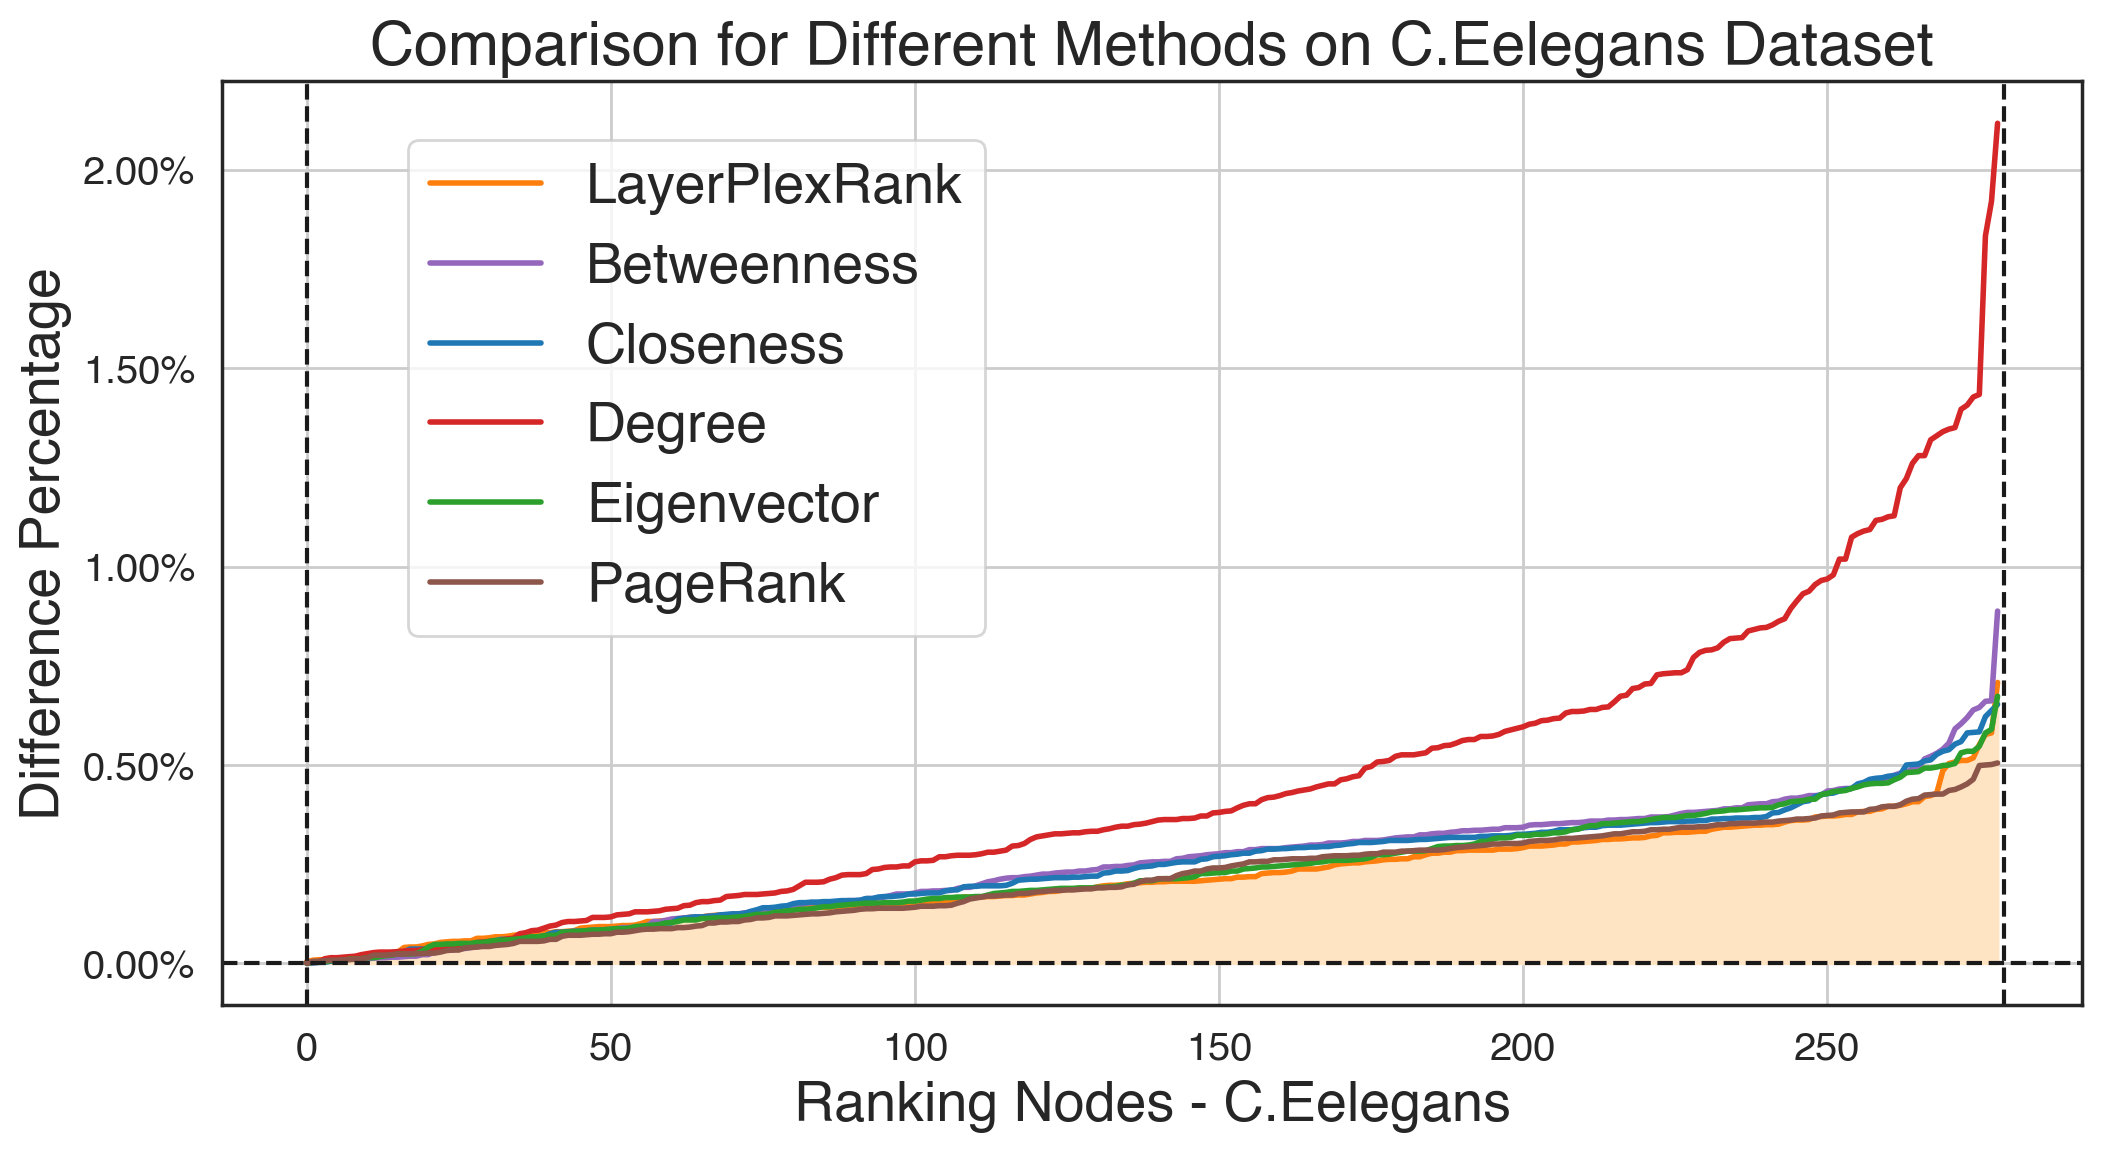

In [38]:
colours_group = ['tab:orange', 'tab:purple', 'tab:blue', 'tab:red', 'tab:green', 'tab:brown']

ce_diff_fig_xlabel = "Ranking Nodes - C.Eelegans"
ce_diff_fig_ylabel = "Difference Percentage"
ce_diff_fig_title = "Comparison for Different Methods on C.Eelegans Dataset"

ce_diff_fig_save_path = "img/ce_exp2_diff_fig.eps"

# Creating a DataFrame for Seaborn
ce_diff_fig_data = pd.DataFrame({
    'x-axis': np.arange(0, len(ce_lpr_pct_diff_nodes)),
    'LayerPlexRank': ce_lpr_pct_diff_nodes,
    'Betweenness': ce_b_pct_diff_nodes,
    'Closeness': ce_c_pct_diff_nodes,
    'Degree': ce_d_pct_diff_nodes,
    'Eigenvector': ce_e_pct_diff_nodes,
    'PageRank': ce_p_pct_diff_nodes
})

plot_and_save_diff_percentage_lineplot(ce_diff_fig_data, colours_group, ce_diff_fig_xlabel,
                                       ce_diff_fig_ylabel, ce_diff_fig_title, ce_diff_fig_save_path)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


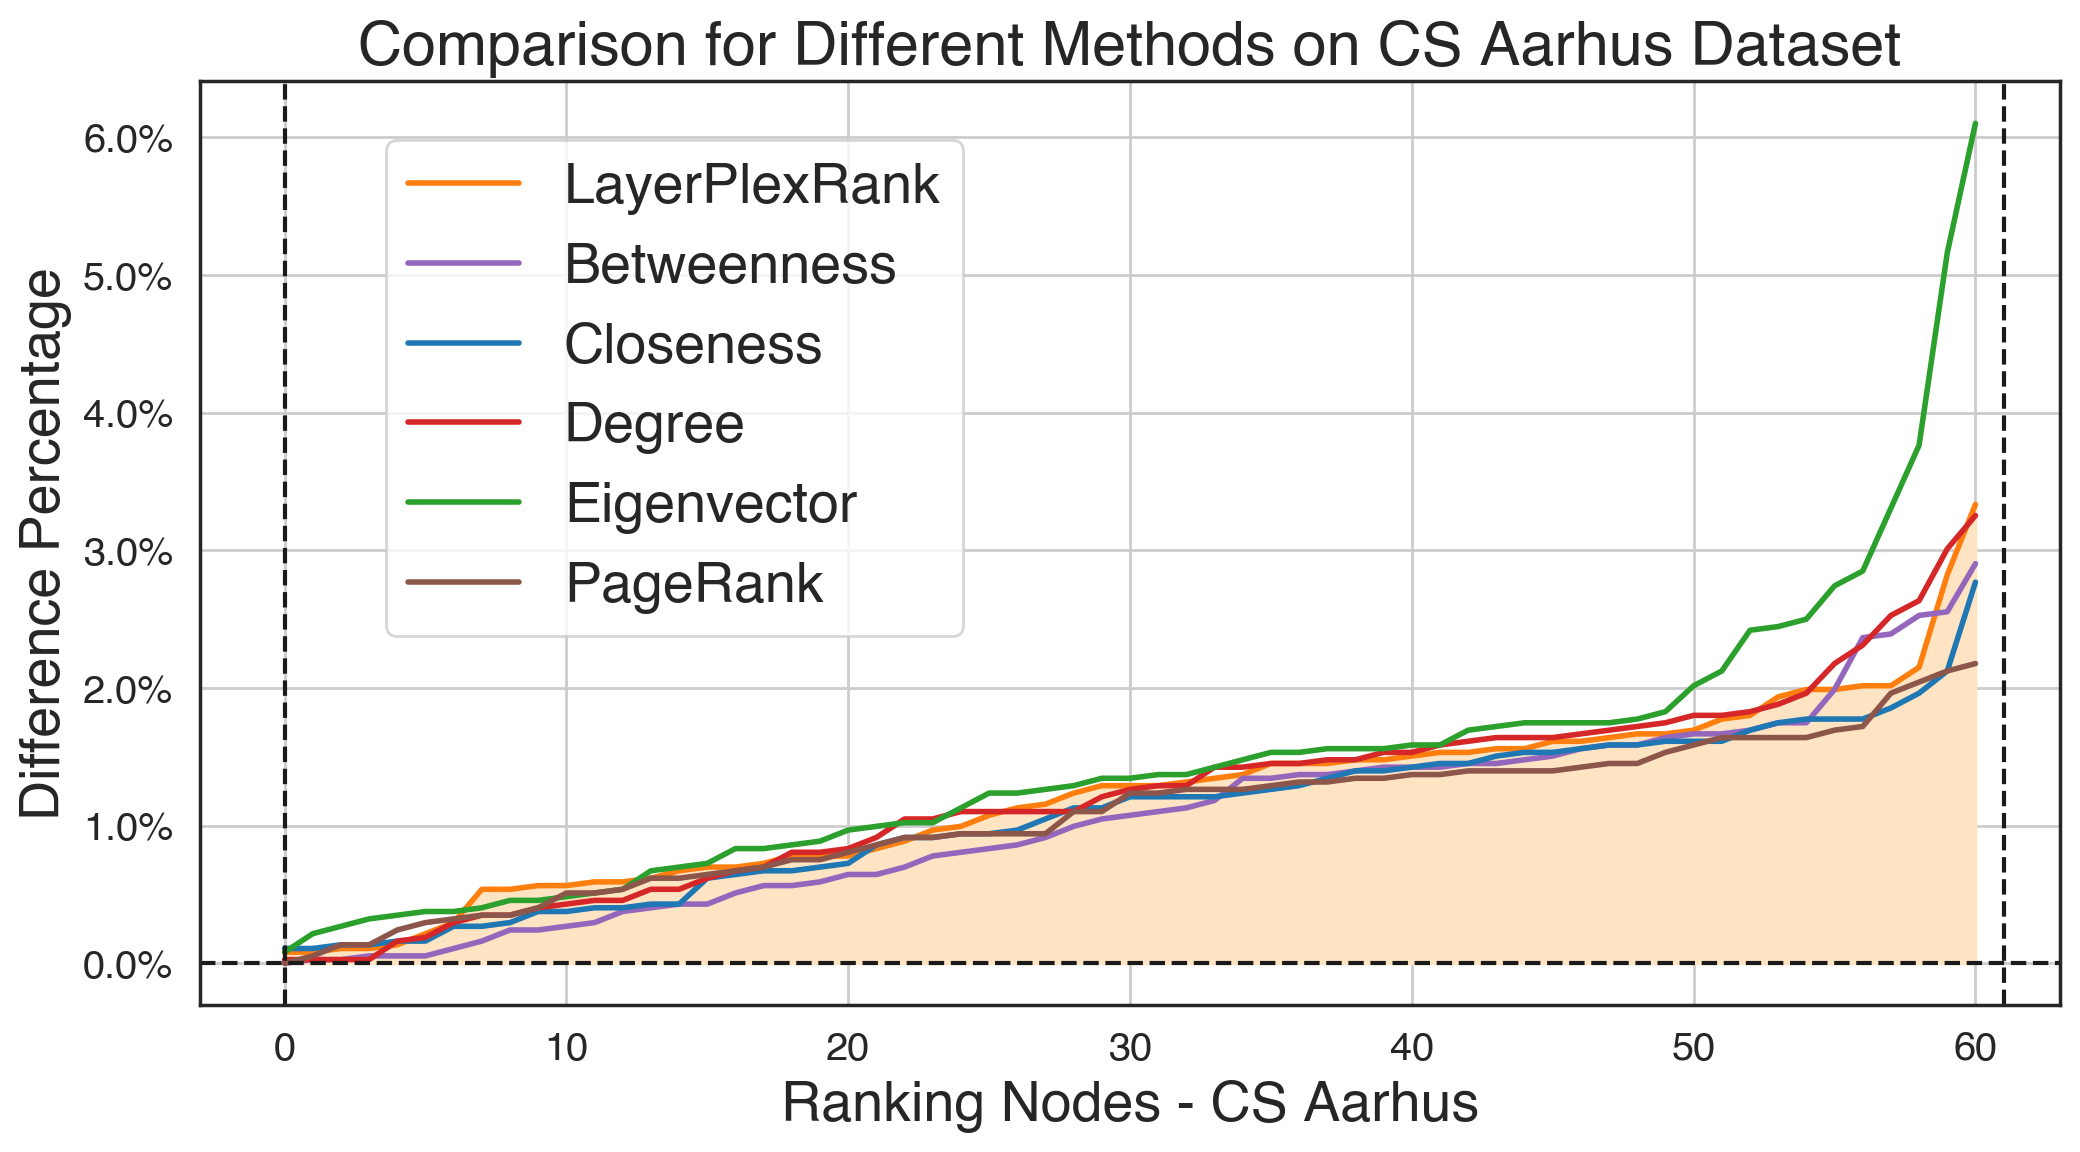

In [39]:
aarhus_diff_fig_xlabel = "Ranking Nodes - CS Aarhus"
aarhus_diff_fig_ylabel = "Difference Percentage"
aarhus_diff_fig_title = "Comparison for Different Methods on CS Aarhus Dataset"

aarhus_diff_fig_save_path = "img/aarhus_exp2_diff_fig.eps"

# Creating a DataFrame for Seaborn
aarhus_diff_fig_data = pd.DataFrame({
    'x-axis': np.arange(0, len(aarhus_lpr_pct_diff_nodes)),
    'LayerPlexRank': aarhus_lpr_pct_diff_nodes,
    'Betweenness': aarhus_b_pct_diff_nodes,
    'Closeness': aarhus_c_pct_diff_nodes,
    'Degree': aarhus_d_pct_diff_nodes,
    'Eigenvector': aarhus_e_pct_diff_nodes,
    'PageRank': aarhus_p_pct_diff_nodes
})

plot_and_save_diff_percentage_lineplot(aarhus_diff_fig_data, colours_group, aarhus_diff_fig_xlabel,
                                       aarhus_diff_fig_ylabel, aarhus_diff_fig_title, aarhus_diff_fig_save_path)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


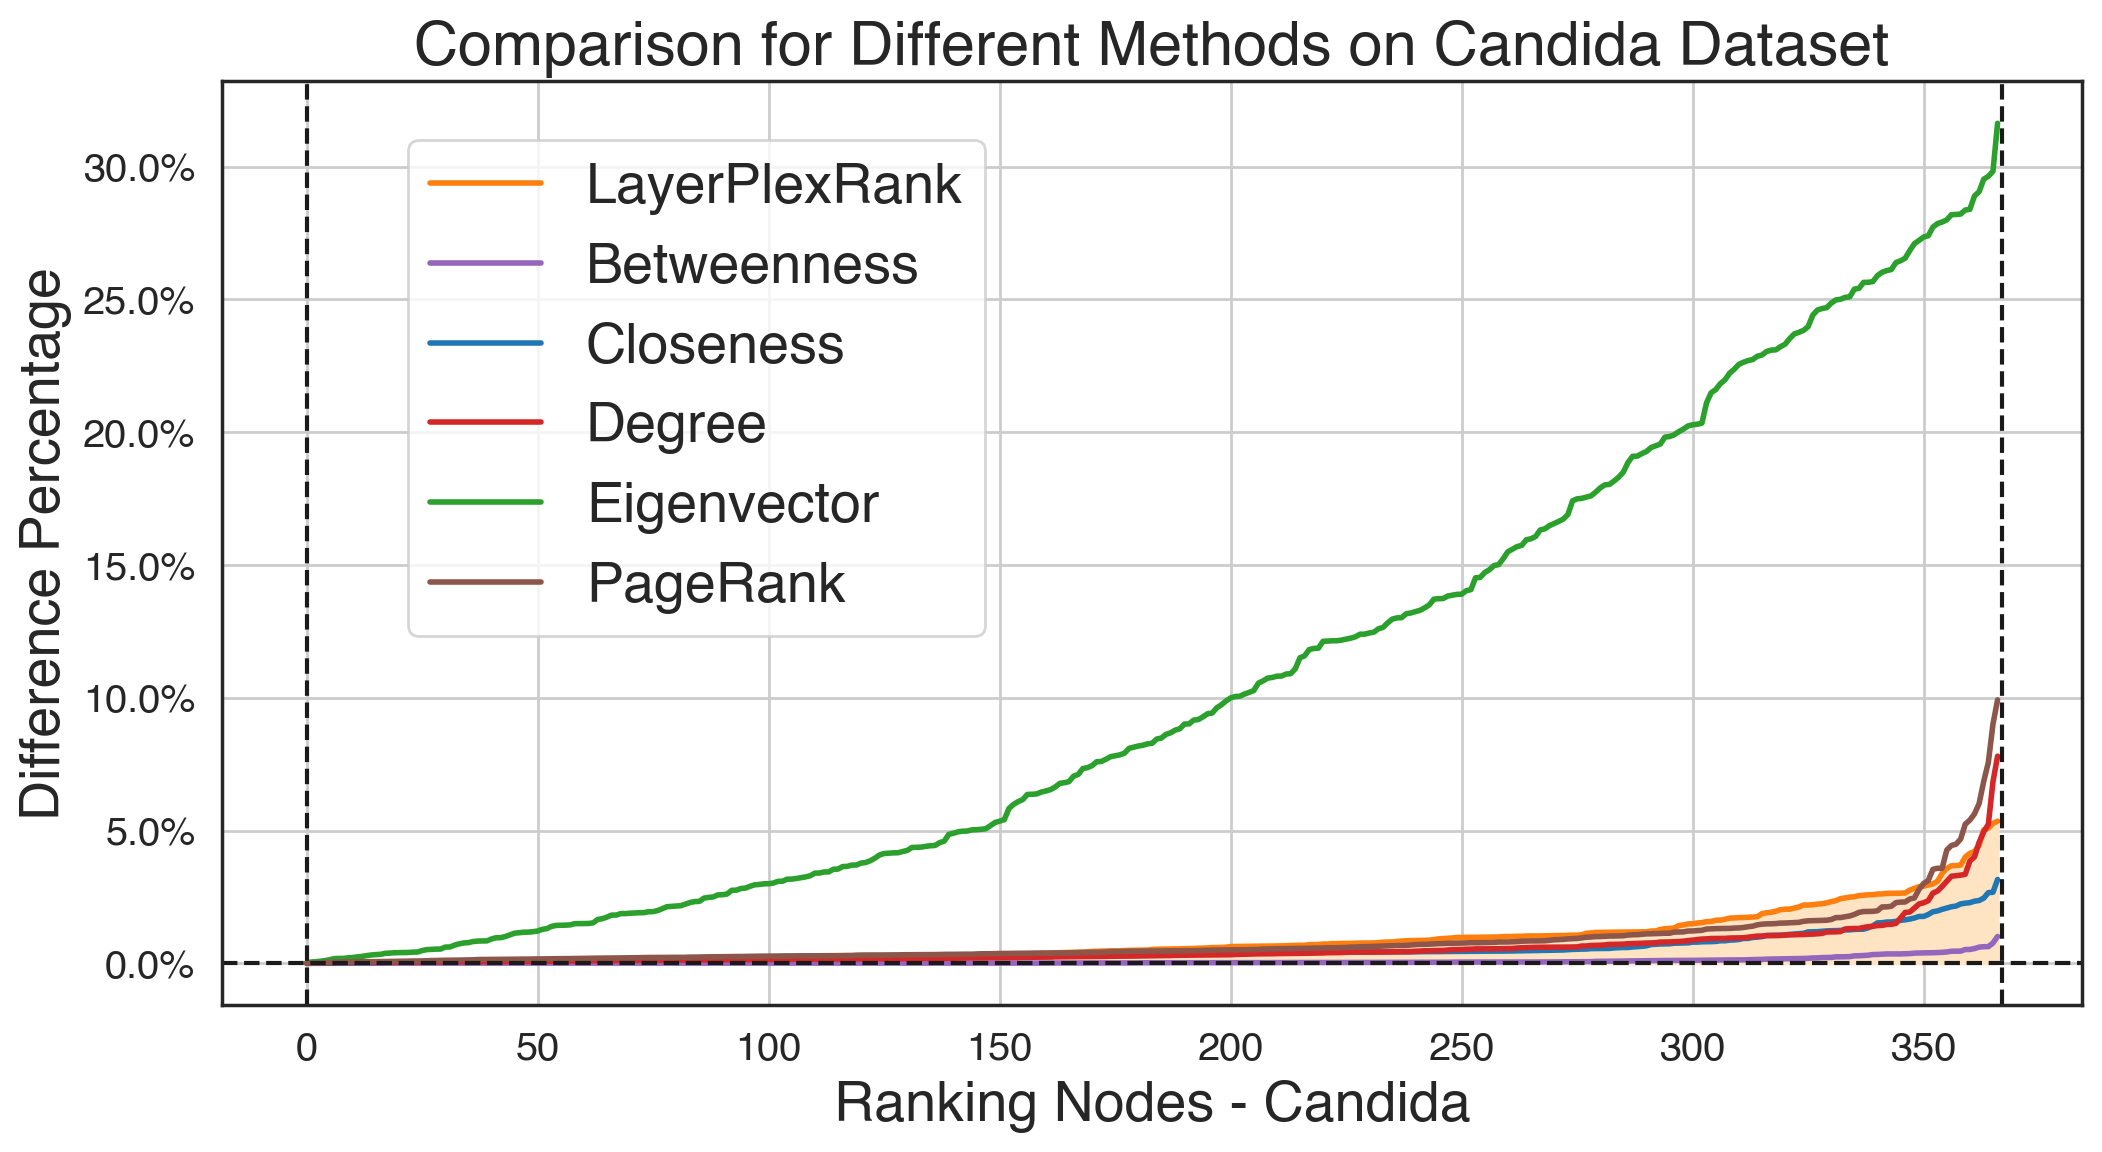

In [40]:
candida_diff_fig_xlabel = "Ranking Nodes - Candida"
candida_diff_fig_ylabel = "Difference Percentage"
candida_diff_fig_title = "Comparison for Different Methods on Candida Dataset"

candida_diff_fig_save_path = "img/candida_exp2_diff_fig.eps"

# Creating a DataFrame for Seaborn
candida_diff_fig_data = pd.DataFrame({
    'x-axis': np.arange(0, len(candida_lpr_pct_diff_nodes)),
    'LayerPlexRank': candida_lpr_pct_diff_nodes,
    'Betweenness': candida_b_pct_diff_nodes,
    'Closeness': candida_c_pct_diff_nodes,
    'Degree': candida_d_pct_diff_nodes,
    'Eigenvector': candida_e_pct_diff_nodes,
    'PageRank': candida_p_pct_diff_nodes
})

plot_and_save_diff_percentage_lineplot(candida_diff_fig_data, colours_group, candida_diff_fig_xlabel,
                                       candida_diff_fig_ylabel, candida_diff_fig_title, candida_diff_fig_save_path)

100%|██████████████████████████████████████████| 31/31 [00:00<00:00, 328.45it/s]


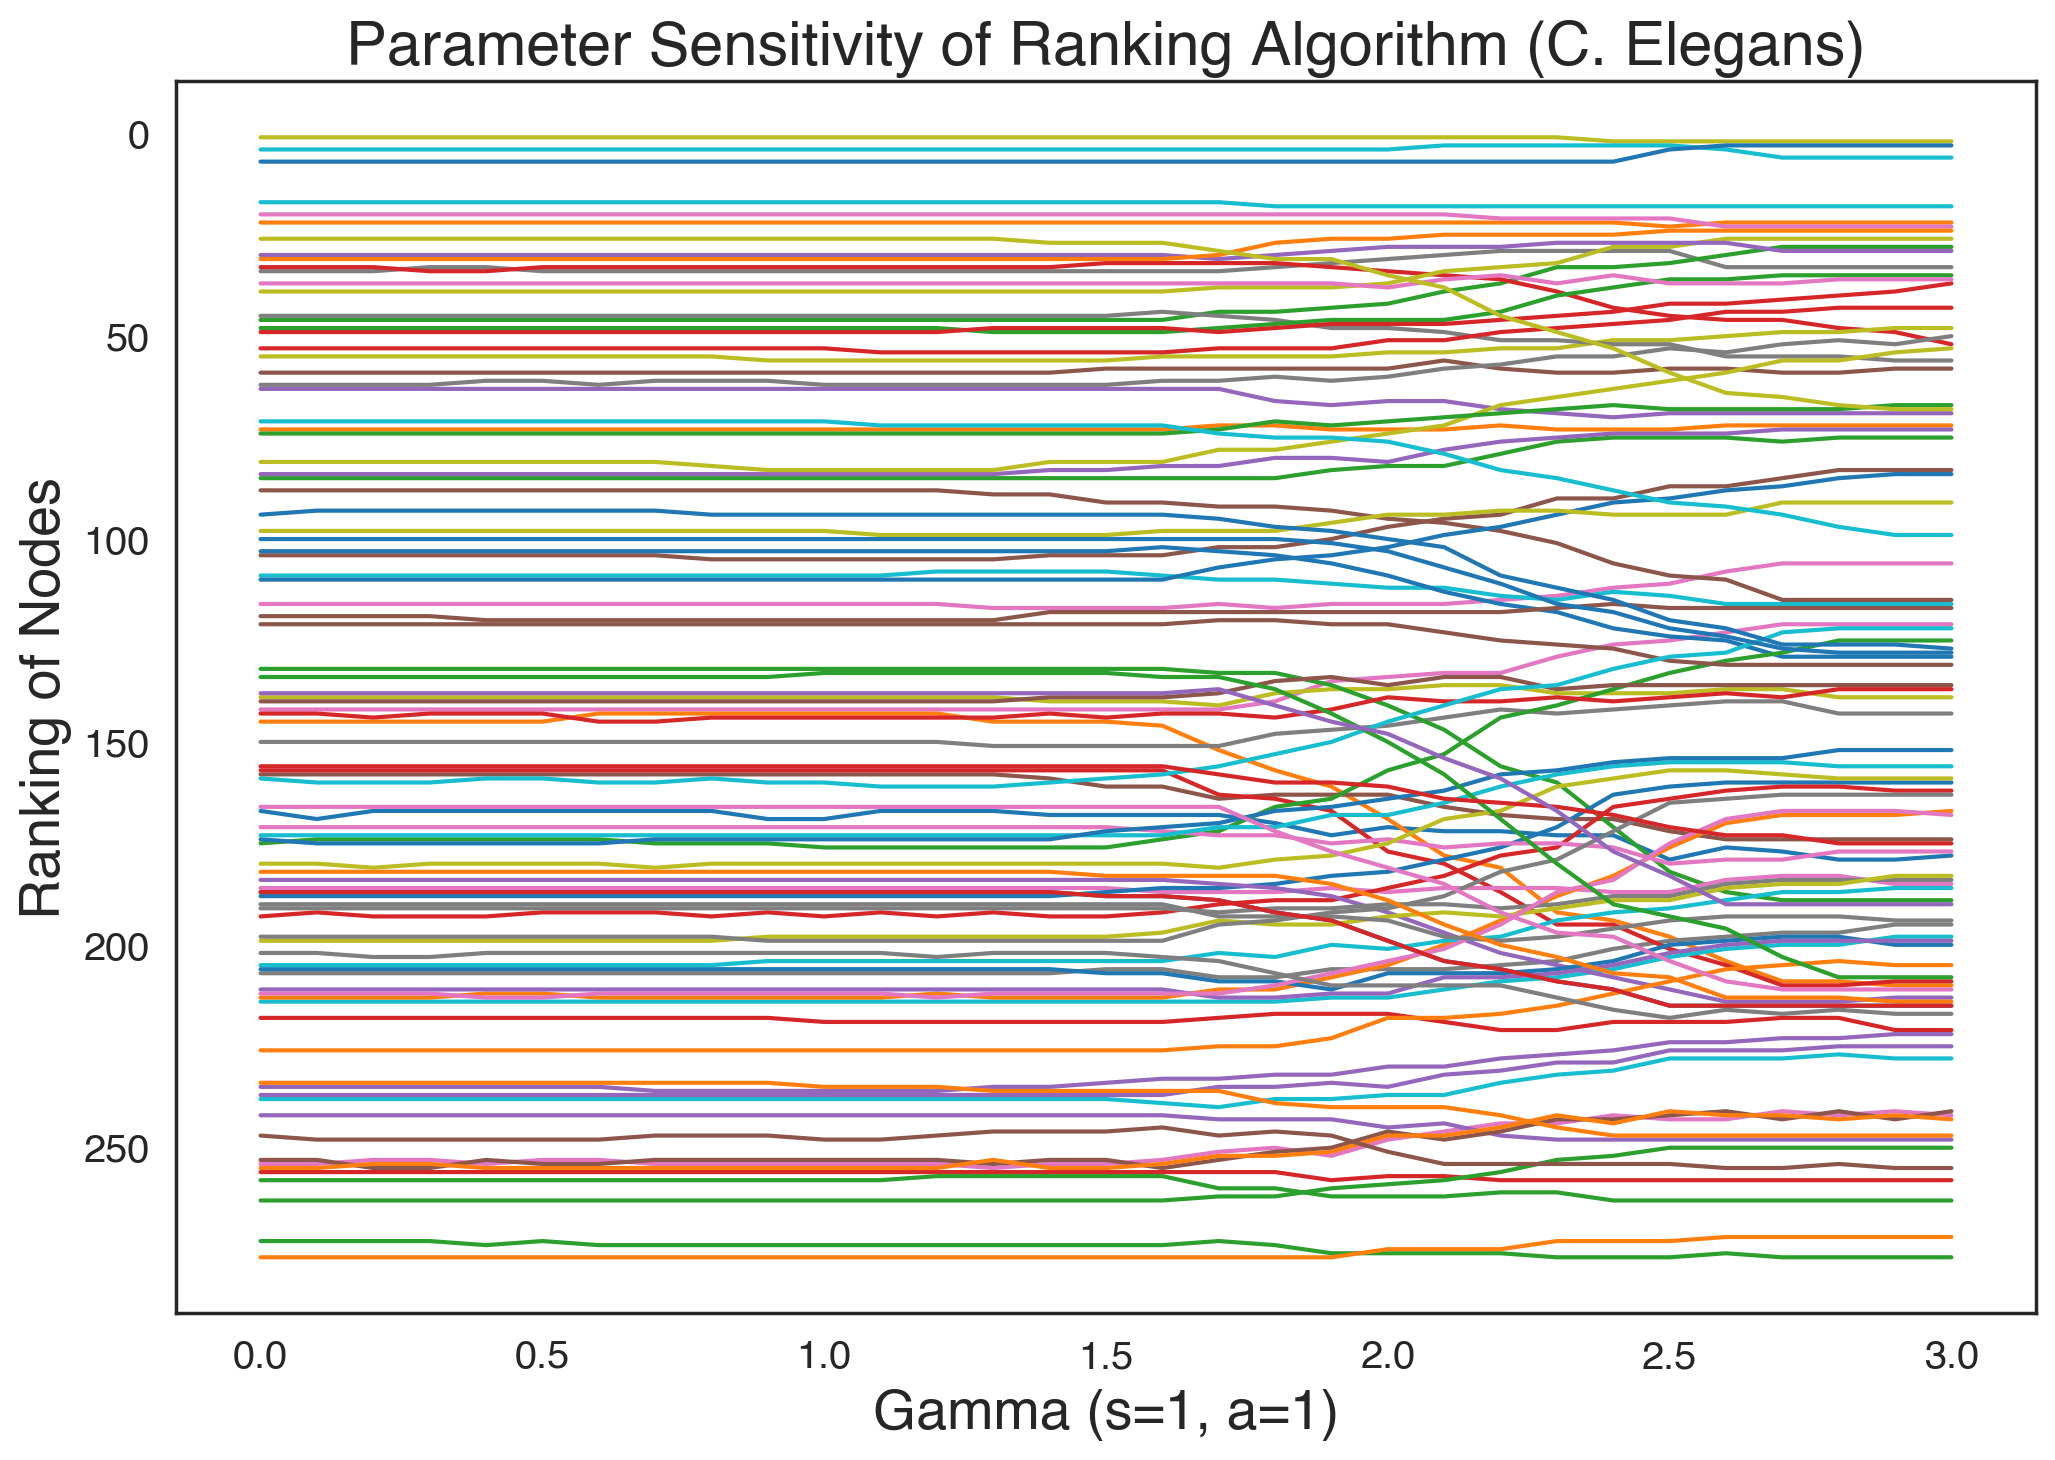

In [69]:
ce_para_fig_xlabel = "Gamma (s=1, a=1)"
ce_para_fig_ylabel = "Ranking of Nodes"
ce_para_fig_title = "Parameter Sensitivity of Ranking Algorithm (C. Elegans)"

ce_para_fig_save_path = "img/ce_exp3_para_fig.eps"

ce_node_ids = np.arange(0, 280, 3)  # List of node IDs
ce_sens = parameter_sensitivity(ce_network, ce_shape, ce_node_ids)

plot_and_save_para_sensitivity(ce_sens, ce_para_fig_xlabel, ce_para_fig_ylabel, ce_para_fig_title, ce_para_fig_save_path)

100%|██████████████████████████████████████████| 31/31 [00:00<00:00, 747.71it/s]


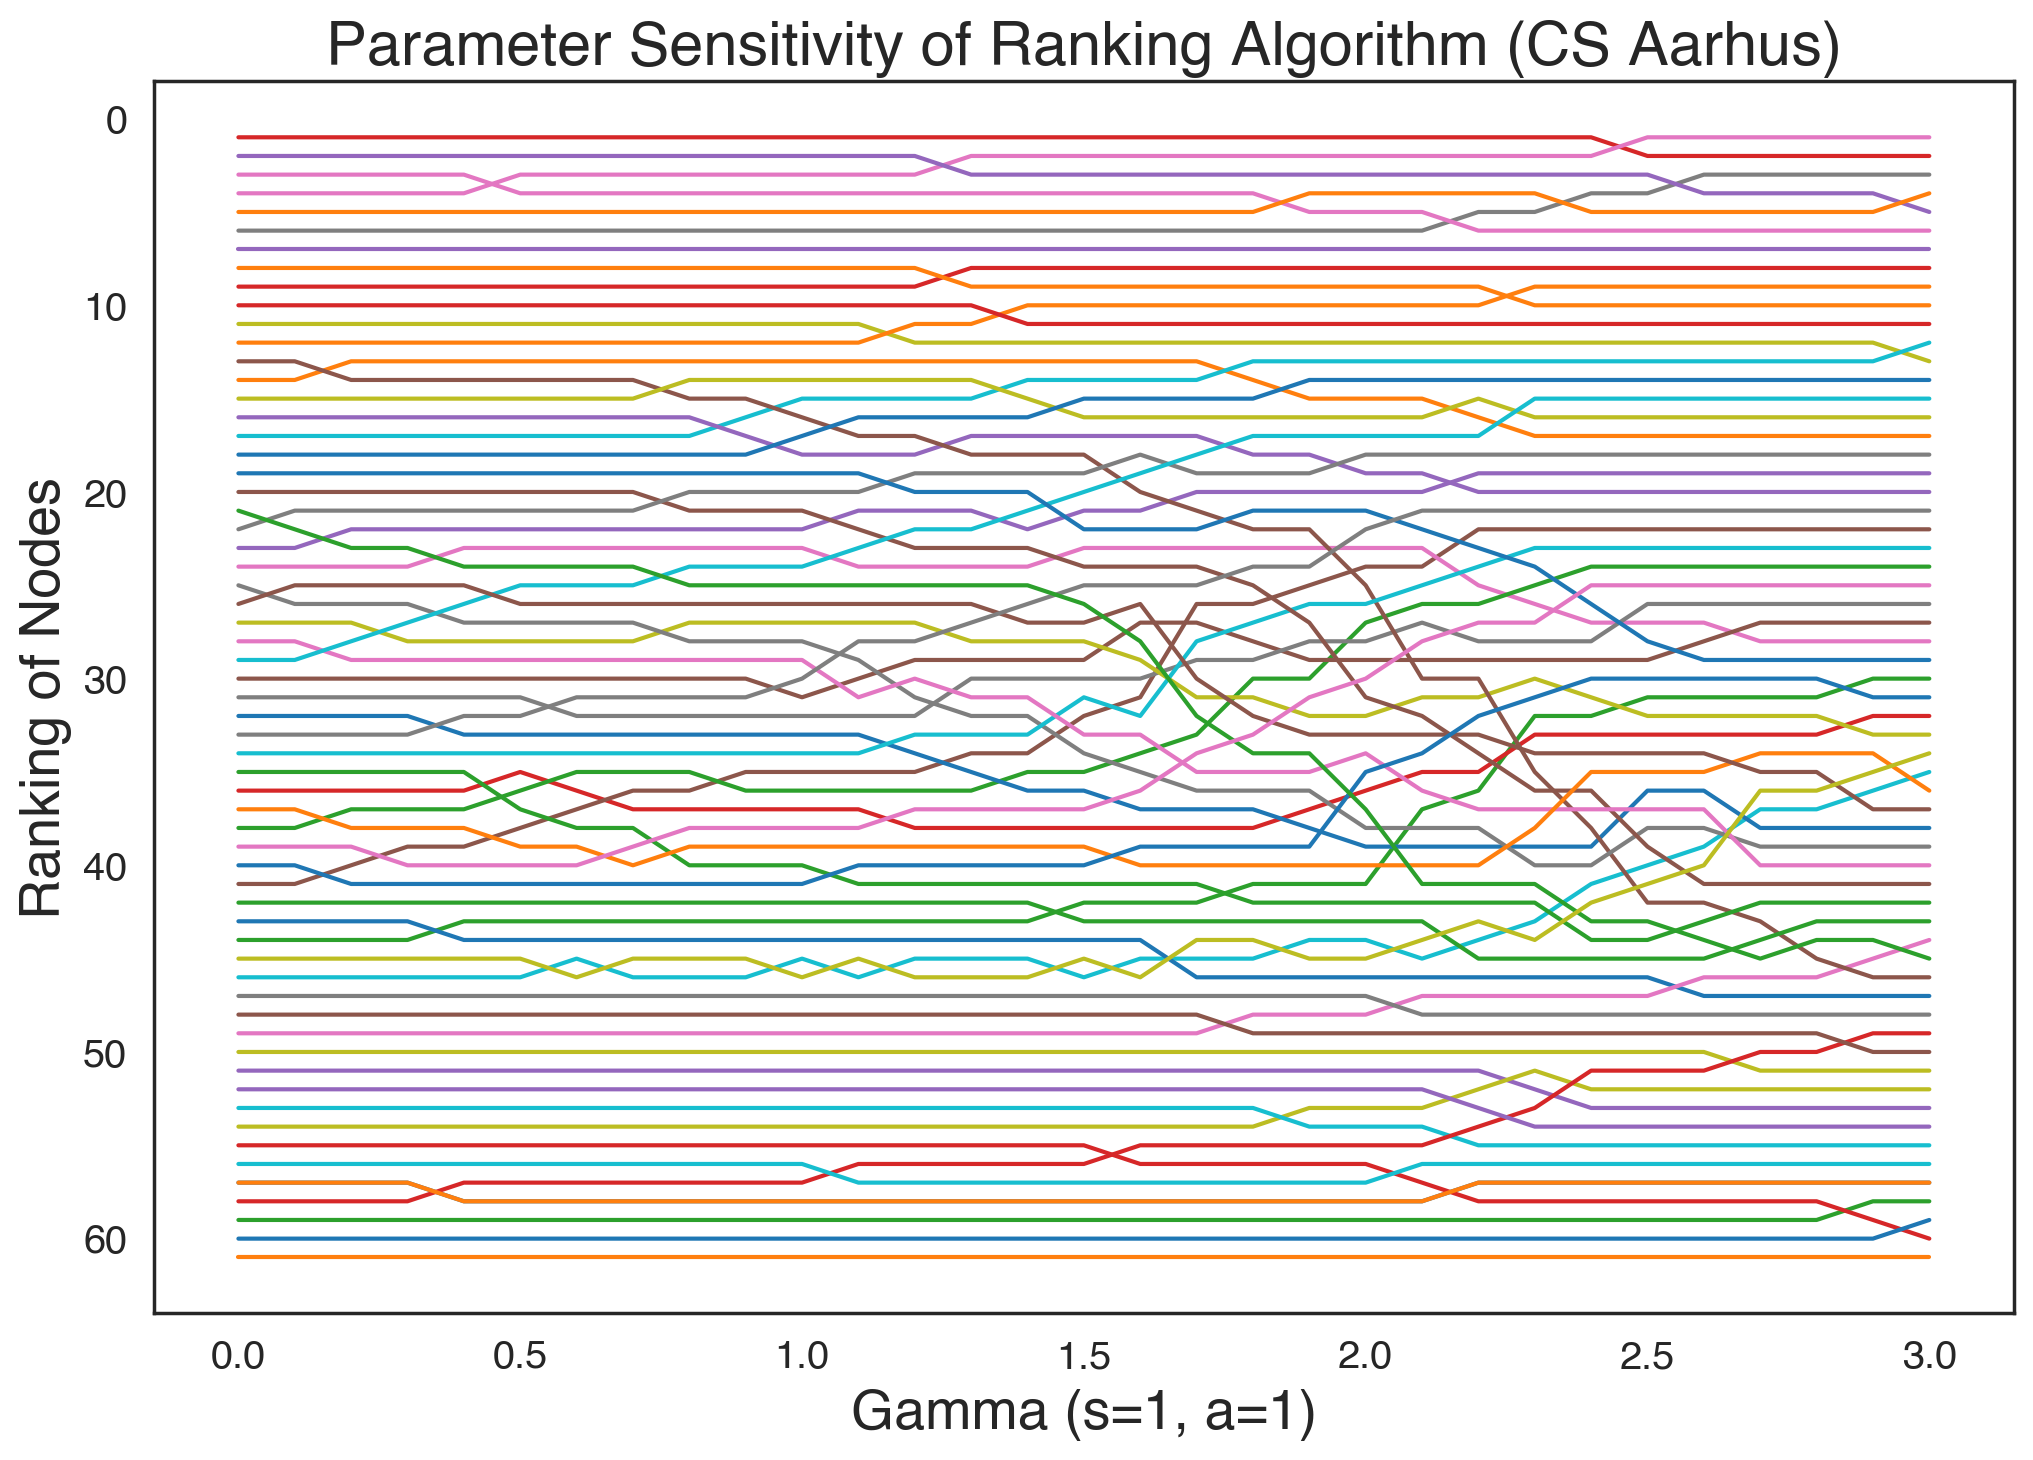

In [70]:
aarhus_para_fig_xlabel = "Gamma (s=1, a=1)"
aarhus_para_fig_ylabel = "Ranking of Nodes"
aarhus_para_fig_title = "Parameter Sensitivity of Ranking Algorithm (CS Aarhus)"

aarhus_para_fig_save_path = "img/aarhus_exp3_para_fig.eps"

aarhus_node_ids = np.arange(0, 62, 1)  # List of node IDs
aarhus_sens = parameter_sensitivity(aarhus_network, aarhus_shape, aarhus_node_ids)

plot_and_save_para_sensitivity(aarhus_sens, aarhus_para_fig_xlabel, aarhus_para_fig_ylabel, aarhus_para_fig_title, aarhus_para_fig_save_path)

100%|██████████████████████████████████████████| 31/31 [00:00<00:00, 108.09it/s]


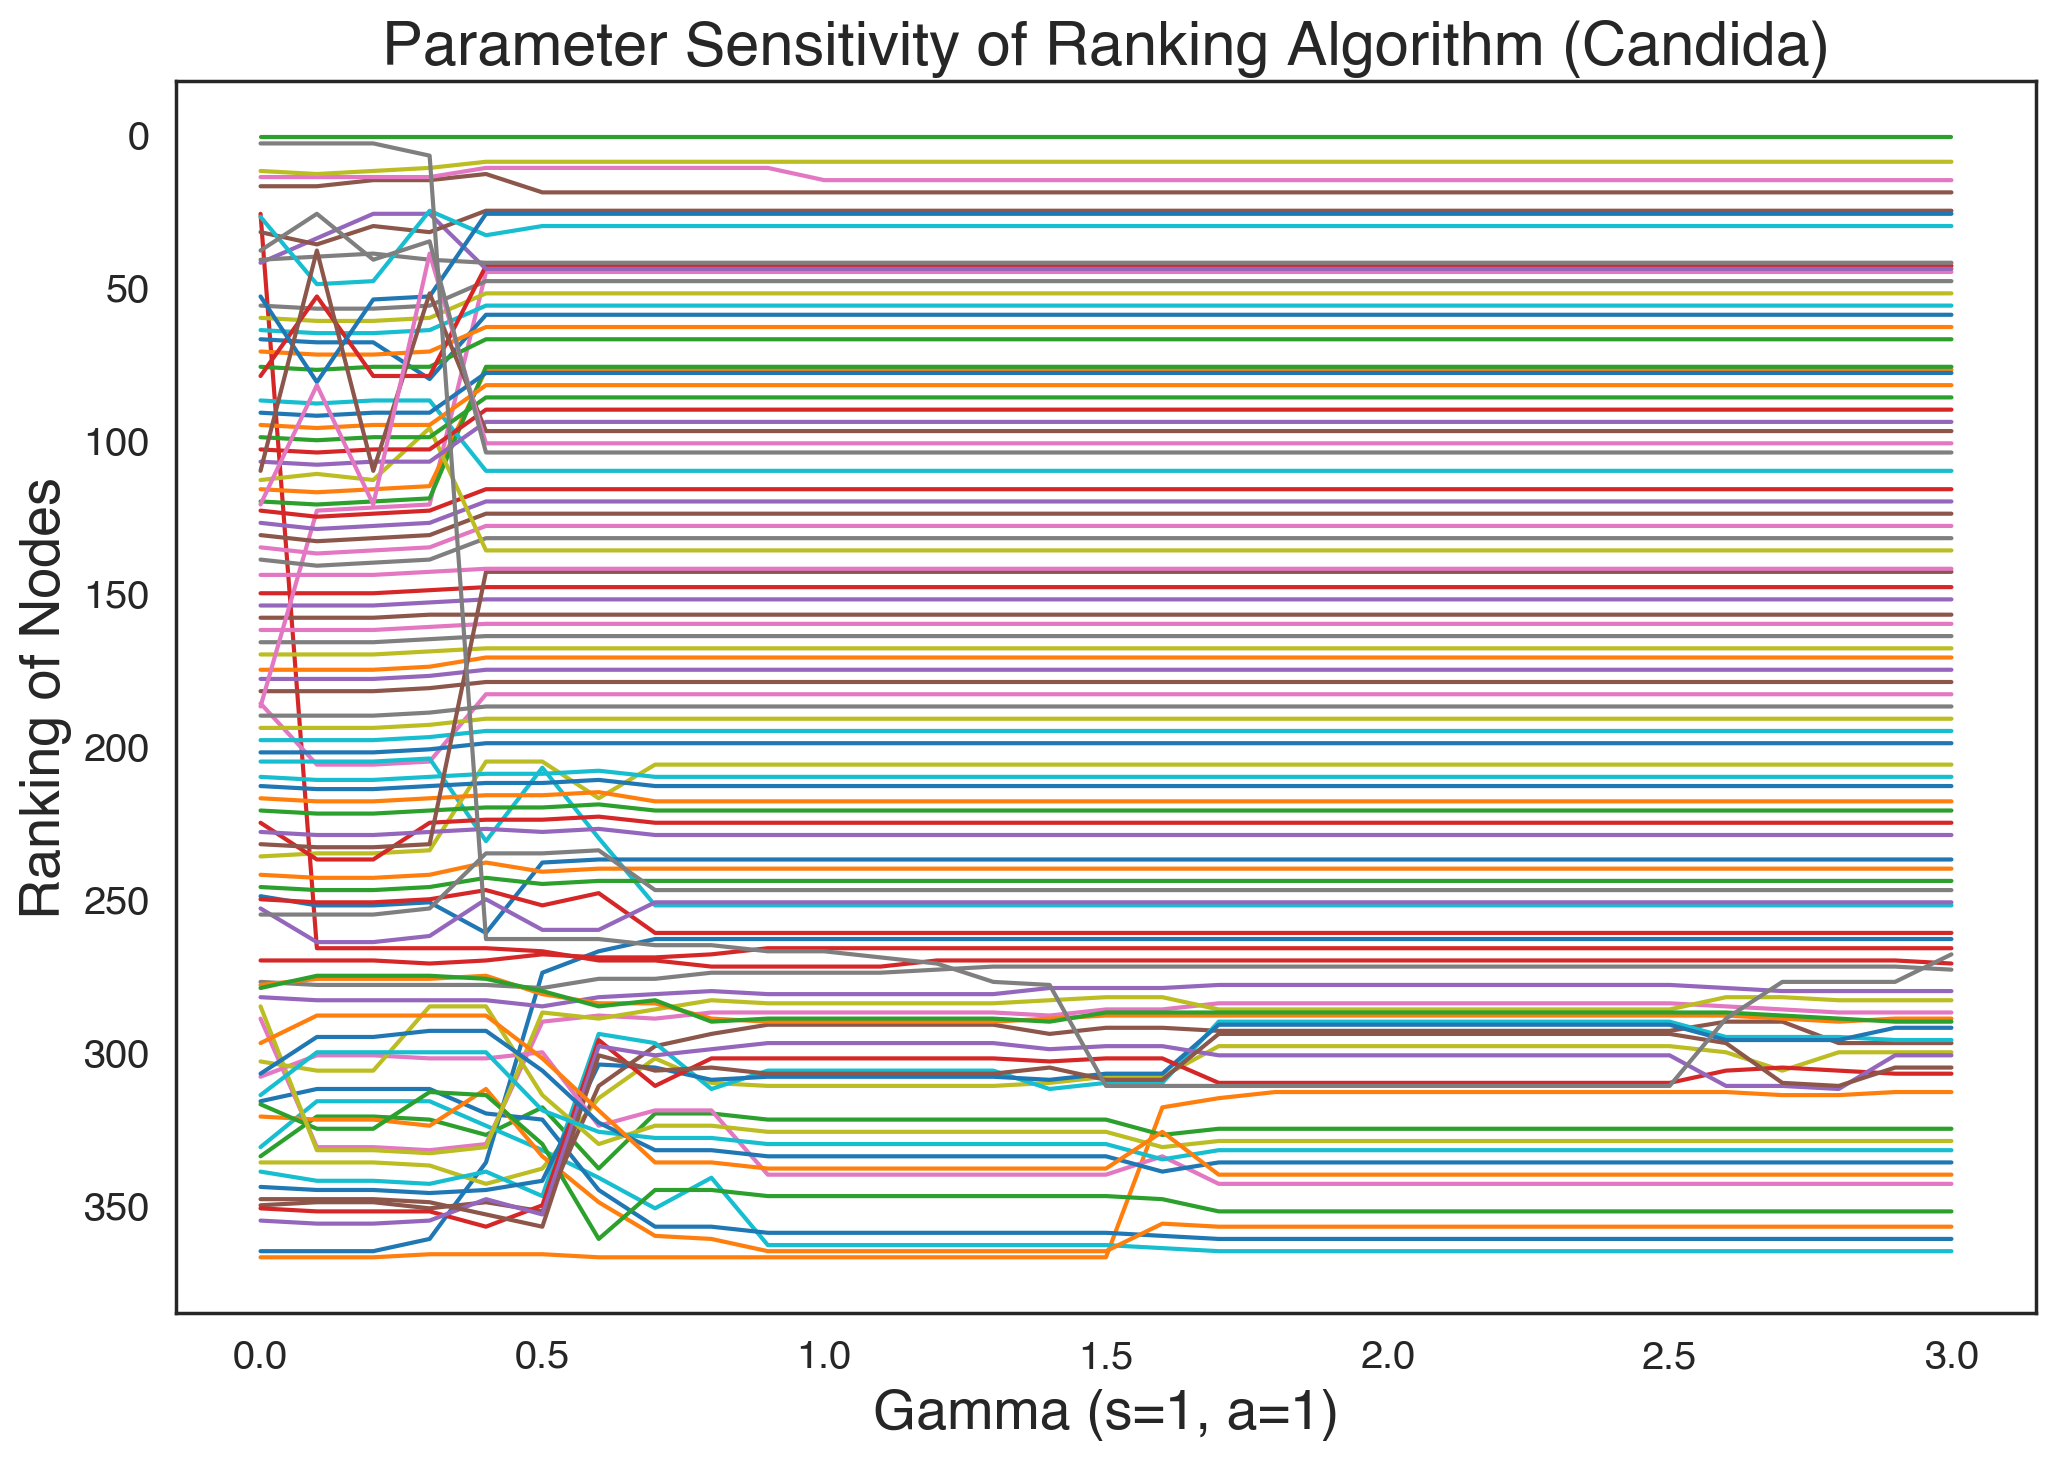

In [71]:
candida_para_fig_xlabel = "Gamma (s=1, a=1)"
candida_para_fig_ylabel = "Ranking of Nodes"
candida_para_fig_title = "Parameter Sensitivity of Ranking Algorithm (Candida)"

candida_para_fig_save_path = "img/candida_exp3_para_fig.eps"

candida_node_ids = np.arange(0, 368, 4)  # List of node IDs
candida_sens = parameter_sensitivity(candida_network, candida_shape, candida_node_ids)

plot_and_save_para_sensitivity(candida_sens, candida_para_fig_xlabel, candida_para_fig_ylabel, candida_para_fig_title, candida_para_fig_save_path)